In [1]:
# warngling
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100

# visualization
from matplotlib import pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

# mapping
import fiona
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from shapely.geometry import Point

from pprint import pprint

# census

## import census data

In [2]:
def read_data(path):
    df = pd.read_csv(path, index_col = 0)
    df.columns = df.columns.str.lower().str.replace("estimate!!", "").str.replace(" ", "_").str.replace("!!", "_")

    return df

In [3]:
# load entry_us data
path="data/acs2017_county_entry_us.csv"
entry_us_df = read_data(path)
print(entry_us_df.shape)
entry_us_df.head()

(58, 25)


,geography,total,total_entered_2010_or_later,total_entered_2010_or_later_native,total_entered_2010_or_later_foreign_born,total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen,total_entered_2010_or_later_foreign_born_not_a_u.s._citizen,total_entered_2000_to_2009,total_entered_2000_to_2009_native,total_entered_2000_to_2009_foreign_born,total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen,total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen,total_entered_1990_to_1999,total_entered_1990_to_1999_native,total_entered_1990_to_1999_foreign_born,total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen,total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen,total_entered_before_1990,total_entered_before_1990_native,total_entered_before_1990_foreign_born,total_entered_before_1990_foreign_born_naturalized_u.s._citizen,total_entered_before_1990_foreign_born_not_a_u.s._citizen,name,state,county
0,0500000US06049,675,31,4,27,0,27,243,0,243,23,220,121,8,113,0,113,280,22,258,105,153,"Modoc County, California",6,49
1,0500000US06047,70193,4903,178,4725,554,4171,16993,342,16651,3770,12881,17777,267,17510,5411,12099,30520,1202,29318,17054,12264,"Merced County, California",6,47
2,0500000US06033,6252,296,40,256,30,226,1432,140,1292,172,1120,1511,70,1441,728,713,3013,397,2616,1672,944,"Lake County, California",6,33
3,0500000US06043,1370,131,21,110,17,93,418,13,405,56,349,164,0,164,119,45,657,128,529,359,170,"Mariposa County, California",6,43
4,0500000US06115,10103,834,169,665,0,665,2619,278,2341,624,1717,2666,131,2535,1024,1511,3984,438,3546,2697,849,"Yuba County, California",6,115


In [4]:
# load citizenship data
path="data/acs2017_county_citizenship.csv"
citizenship_df = read_data(path)
print(citizenship_df.shape)
citizenship_df.head()

(58, 10)


,geography,total,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county
0,0500000US06049,9017,8342,3,31,128,513,"Modoc County, California",6,49
1,0500000US06047,267390,197197,269,1720,26789,41415,"Merced County, California",6,47
2,0500000US06033,64095,57843,29,618,2602,3003,"Lake County, California",6,33
3,0500000US06043,17658,16288,0,162,551,657,"Mariposa County, California",6,43
4,0500000US06115,74644,64541,129,887,4345,4742,"Yuba County, California",6,115


In [5]:
# merge
cs_agg_df = pd.merge(citizenship_df, entry_us_df, how="inner",
                     on=["geography", "name", "state", "county"],
                     suffixes=["_citizenship", "_entry_us"])
print(cs_agg_df.shape)
cs_agg_df.head()

(58, 31)


,geography,total_citizenship,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county,total_entry_us,total_entered_2010_or_later,total_entered_2010_or_later_native,total_entered_2010_or_later_foreign_born,total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen,total_entered_2010_or_later_foreign_born_not_a_u.s._citizen,total_entered_2000_to_2009,total_entered_2000_to_2009_native,total_entered_2000_to_2009_foreign_born,total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen,total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen,total_entered_1990_to_1999,total_entered_1990_to_1999_native,total_entered_1990_to_1999_foreign_born,total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen,total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen,total_entered_before_1990,total_entered_before_1990_native,total_entered_before_1990_foreign_born,total_entered_before_1990_foreign_born_naturalized_u.s._citizen,total_entered_before_1990_foreign_born_not_a_u.s._citizen
0,0500000US06049,9017,8342,3,31,128,513,"Modoc County, California",6,49,675,31,4,27,0,27,243,0,243,23,220,121,8,113,0,113,280,22,258,105,153
1,0500000US06047,267390,197197,269,1720,26789,41415,"Merced County, California",6,47,70193,4903,178,4725,554,4171,16993,342,16651,3770,12881,17777,267,17510,5411,12099,30520,1202,29318,17054,12264
2,0500000US06033,64095,57843,29,618,2602,3003,"Lake County, California",6,33,6252,296,40,256,30,226,1432,140,1292,172,1120,1511,70,1441,728,713,3013,397,2616,1672,944
3,0500000US06043,17658,16288,0,162,551,657,"Mariposa County, California",6,43,1370,131,21,110,17,93,418,13,405,56,349,164,0,164,119,45,657,128,529,359,170
4,0500000US06115,74644,64541,129,887,4345,4742,"Yuba County, California",6,115,10103,834,169,665,0,665,2619,278,2341,624,1717,2666,131,2535,1024,1511,3984,438,3546,2697,849


## create features

In [6]:
cs_agg_df["non-citizen_rate"] = cs_agg_df["total_not_a_u.s._citizen"] / cs_agg_df["total_citizenship"]
cs_agg_df["naturalized_rate"] = cs_agg_df["total_u.s._citizen_by_naturalization"] / \
                                (cs_agg_df["total_u.s._citizen_by_naturalization"] + cs_agg_df["total_not_a_u.s._citizen"])
cs_agg_df["growing_rate"] = ((cs_agg_df["total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen"] + \
                            cs_agg_df["total_entered_2010_or_later_foreign_born_not_a_u.s._citizen"]) / 8) / \
                            ((cs_agg_df["total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen"] + \
                            cs_agg_df["total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen"]) / 10)
cs_agg_df.tail()

,geography,total_citizenship,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county,total_entry_us,total_entered_2010_or_later,total_entered_2010_or_later_native,total_entered_2010_or_later_foreign_born,total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen,total_entered_2010_or_later_foreign_born_not_a_u.s._citizen,total_entered_2000_to_2009,total_entered_2000_to_2009_native,total_entered_2000_to_2009_foreign_born,total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen,total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen,total_entered_1990_to_1999,total_entered_1990_to_1999_native,total_entered_1990_to_1999_foreign_born,total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen,total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen,total_entered_before_1990,total_entered_before_1990_native,total_entered_before_1990_foreign_born,total_entered_before_1990_foreign_born_naturalized_u.s._citizen,total_entered_before_1990_foreign_born_not_a_u.s._citizen,non-citizen_rate,naturalized_rate,growing_rate
53,0500000US06101,95583,72346,192,1386,10576,11083,"Sutter County, California",6,101,23237,2273,173,2100,124,1976,6941,484,6457,2456,4001,5892,190,5702,2755,2947,8131,731,7400,5241,2159,0.115952,0.488296,0.406536
54,0500000US06081,763450,485042,1517,11985,150935,113971,"San Mateo County, California",6,81,278408,38293,2109,36184,2733,33451,65445,2581,62864,20904,41960,62931,2050,60881,38089,22792,111739,6762,104977,89209,15768,0.149284,0.569768,0.719490
55,0500000US06109,53899,50920,24,435,1626,894,"Tuolumne County, California",6,109,2979,315,96,219,26,193,402,123,279,137,142,547,11,536,351,185,1715,229,1486,1112,374,0.016587,0.645238,0.981183
56,0500000US06077,724153,547060,1364,7352,79696,88681,"San Joaquin County, California",6,77,177093,18983,1533,17450,1908,15542,43867,1829,42038,12711,29327,43852,1388,42464,19920,22544,70391,3966,66425,45157,21268,0.122462,0.473319,0.518876
57,0500000US06005,37306,34849,28,178,1308,943,"Amador County, California",6,5,2457,178,2,176,26,150,440,64,376,172,204,272,15,257,158,99,1567,125,1442,952,490,0.025277,0.581075,0.585106


Text(0, 0.5, 'immigrant growing rate')

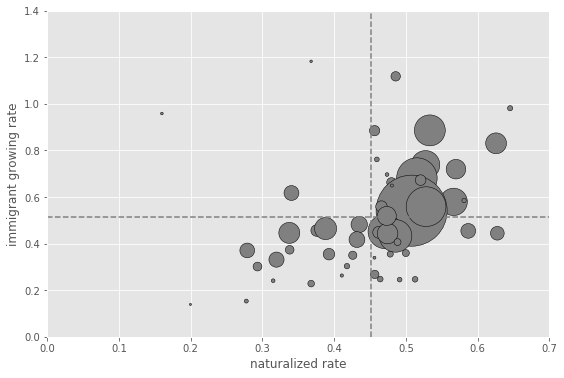

In [7]:
fig,ax = plt.subplots(figsize=(9,6))

ax.scatter("naturalized_rate", "growing_rate", data=cs_agg_df,
            s=cs_agg_df["total_citizenship"]/2000, c="gray",
            linewidths=0.5, edgecolors="black")
ax.hlines(np.mean(cs_agg_df[cs_agg_df["growing_rate"] < 2]["growing_rate"]), xmin=0, xmax=2, colors="gray", linestyles="dashed")
ax.vlines(np.mean(cs_agg_df[cs_agg_df["growing_rate"] < 2]["naturalized_rate"]), ymin=0, ymax=3, colors="gray", linestyles="dashed")
ax.set_xlim(0,0.7)
ax.set_ylim(0,1.4)
ax.set_xlabel("naturalized rate")
ax.set_ylabel("immigrant growing rate")

In [21]:
cs_agg_df.shape

(58, 34)

In [20]:
cs_agg_df[(cs_agg_df["naturalized_rate"] < 0.45) & (cs_agg_df["growing_rate"] > 0.5)]

,geography,total_citizenship,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county,total_entry_us,total_entered_2010_or_later,total_entered_2010_or_later_native,total_entered_2010_or_later_foreign_born,total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen,total_entered_2010_or_later_foreign_born_not_a_u.s._citizen,total_entered_2000_to_2009,total_entered_2000_to_2009_native,total_entered_2000_to_2009_foreign_born,total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen,total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen,total_entered_1990_to_1999,total_entered_1990_to_1999_native,total_entered_1990_to_1999_foreign_born,total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen,total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen,total_entered_before_1990,total_entered_before_1990_native,total_entered_before_1990_foreign_born,total_entered_before_1990_foreign_born_naturalized_u.s._citizen,total_entered_before_1990_foreign_born_not_a_u.s._citizen,non-citizen_rate,naturalized_rate,growing_rate
9,0500000US06083,442996,335612,498,5124,34647,67115,"Santa Barbara County, California",6,83,107384,14185,826,13359,565,12794,27932,876,27056,3612,23444,24141,942,23199,7064,16135,41126,2978,38148,23406,14742,0.151502,0.340471,0.617192
13,0500000US06051,14058,11336,0,276,391,2055,"Mono County, California",6,51,2722,857,249,608,0,608,793,0,793,7,786,469,0,469,88,381,603,27,576,296,280,0.146180,0.159853,0.958386
31,0500000US06105,13037,12203,68,100,245,421,"Trinity County, California",6,105,834,35,0,35,0,35,88,51,37,31,6,184,26,158,87,71,527,91,436,127,309,0.032293,0.367868,1.182432


## import tract shp data

In [8]:
county_geodf = gpd.read_file("data/cb_2017_us_county_20m/cb_2017_us_county_20m.shp")
county_geodf.columns = county_geodf.columns.str.lower()
county_geodf = county_geodf[county_geodf["statefp"] == "06"].sort_values("countyfp").reset_index(drop=True)

In [9]:
mtc_crs = {'init': 'epsg:4326'}
county_geodf = county_geodf.to_crs(mtc_crs)
county_geodf.head()

,statefp,countyfp,countyns,affgeoid,geoid,name,lsad,aland,awater,geometry
0,06,001,01675839,0500000US06001,06001,Alameda,06,1909616630,216916717,"POLYGON ((-122.333711 37.809797, -122.303931 3..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292631,12557304,"POLYGON ((-120.072484 38.50986899999999, -120...."
2,06,005,01675841,0500000US06005,06005,Amador,06,1539933576,29470568,"POLYGON ((-121.027507 38.508292, -120.813554 3..."
3,06,007,01675842,0500000US06007,06007,Butte,06,4238438196,105310997,"POLYGON ((-122.044865 39.883771, -121.804041 3..."
4,06,009,01675885,0500000US06009,06009,Calaveras,06,2641829199,43797662,"POLYGON ((-120.995497 38.225402, -120.892864 3..."


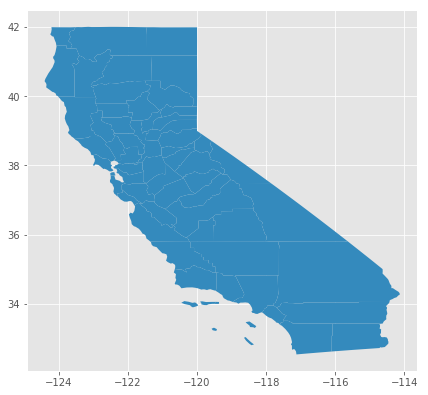

In [10]:
county_geodf.plot(figsize=(7,7))

## merge data

In [11]:
merge_geodf = pd.merge(county_geodf, cs_agg_df, left_on="affgeoid", right_on="geography")
merge_geodf.head()

,statefp,countyfp,countyns,affgeoid,geoid,name_x,lsad,aland,awater,geometry,geography,total_citizenship,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name_y,state,county,total_entry_us,total_entered_2010_or_later,total_entered_2010_or_later_native,total_entered_2010_or_later_foreign_born,total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen,total_entered_2010_or_later_foreign_born_not_a_u.s._citizen,total_entered_2000_to_2009,total_entered_2000_to_2009_native,total_entered_2000_to_2009_foreign_born,total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen,total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen,total_entered_1990_to_1999,total_entered_1990_to_1999_native,total_entered_1990_to_1999_foreign_born,total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen,total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen,total_entered_before_1990,total_entered_before_1990_native,total_entered_before_1990_foreign_born,total_entered_before_1990_foreign_born_naturalized_u.s._citizen,total_entered_before_1990_foreign_born_not_a_u.s._citizen,non-citizen_rate,naturalized_rate,growing_rate
0,06,001,01675839,0500000US06001,06001,Alameda,06,1909616630,216916717,"POLYGON ((-122.333711 37.809797, -122.303931 3...",0500000US06001,1629615,1081065,4673,20061,276213,247603,"Alameda County, California",6,1,548550,88717,3083,85634,6100,79534,149841,4825,145016,51486,93530,128852,4080,124772,79804,44968,181140,12746,168394,138823,29571,0.151940,0.527309,0.738143
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292631,12557304,"POLYGON ((-120.072484 38.50986899999999, -120....",0500000US06003,1203,1153,3,24,14,9,"Alpine County, California",6,3,50,22,12,10,1,9,7,6,1,1,0,5,0,5,5,0,16,9,7,7,0,0.007481,0.608696,12.500000
2,06,005,01675841,0500000US06005,06005,Amador,06,1539933576,29470568,"POLYGON ((-121.027507 38.508292, -120.813554 3...",0500000US06005,37306,34849,28,178,1308,943,"Amador County, California",6,5,2457,178,2,176,26,150,440,64,376,172,204,272,15,257,158,99,1567,125,1442,952,490,0.025277,0.581075,0.585106
3,06,007,01675842,0500000US06007,06007,Butte,06,4238438196,105310997,"POLYGON ((-122.044865 39.883771, -121.804041 3...",0500000US06007,225207,206078,282,1672,8939,8236,"Butte County, California",6,7,19129,2111,163,1948,178,1770,3912,291,3621,1183,2438,4740,320,4420,2192,2228,8366,1180,7186,5386,1800,0.036571,0.520466,0.672466
4,06,009,01675885,0500000US06009,06009,Calaveras,06,2641829199,43797662,"POLYGON ((-120.995497 38.225402, -120.892864 3...",0500000US06009,45057,42064,51,374,1180,1388,"Calaveras County, California",6,9,2993,319,12,307,155,152,547,43,504,81,423,503,15,488,149,339,1624,355,1269,795,474,0.030805,0.459502,0.761409


In [12]:
merge_geodf = gpd.GeoDataFrame(merge_geodf, geometry="geometry", crs=county_geodf.crs)

## plot on map

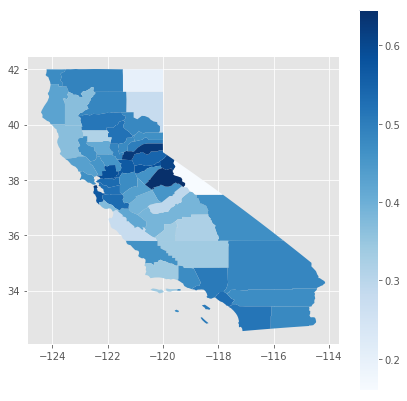

In [13]:
# static map

merge_geodf.plot(column="naturalized_rate", cmap="Blues", legend=True, figsize=(7,7))

In [14]:
# interactive map

ca_coordinates = (37.16611, -119.44944)

ca_map = folium.Map(location=ca_coordinates, zoom_start=6)

# non-citizen rate
folium.Choropleth(
    geo_data = merge_geodf.to_json(),
    data=merge_geodf,
    name="Percentage of non-US citizen in total population",
    columns=["county", "non-citizen_rate"],
    key_on="feature.properties.county",
    fill_color="Blues",
    legend_name="Percentage of non-US citizen in total population"
).add_to(ca_map)

# naturalization rate
folium.Choropleth(
    geo_data = merge_geodf.to_json(),
    data=merge_geodf,
    name="Percentage of naturalization in total immigrants",
    columns=["county", "naturalized_rate"],
    key_on="feature.properties.county",
    fill_color="Greens",
    legend_name="Percentage of naturalization in total immigrants"
).add_to(ca_map)

# immigrant growing rate
folium.Choropleth(
    geo_data = merge_geodf.to_json(),
    data=merge_geodf,
    name="Growing rate of immigrant population",
    columns=["county", "growing_rate"],
    key_on="feature.properties.county",
    fill_color="Oranges",
    legend_name="Growing rate of immigrant population"
).add_to(ca_map)

folium.LayerControl(collapsed=False).add_to(ca_map)

ca_map.save("map/map_prop_of_non_citizen.html")

# CRLA office

## import crla office data

In [15]:
crla_office_df = pd.read_csv("data/crla_office_locations.csv", index_col=0)
crla_office_df.head()

,name,address,longitude,latitude
0,administrative office,"1430 franklin street, suite 103, oakland, ca 9...",-122.26919,37.804375
1,arvin,"211 bear mountain blvd., arvin, ca 93203",-118.82564,35.208841
2,coachella,"1460 6th street, p.o. box 35, coachella, ca 92236",-116.17685,33.678303
3,delano,"601 high street, suite c, delano, ca 93215",-119.24624,35.763884
4,el centro,"449 broadway st., el centro, ca 92243",-115.55365,32.793576


In [16]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(crla_office_df.longitude, crla_office_df.latitude)]
crla_office_geodf = gpd.GeoDataFrame(crla_office_df, crs=crs, geometry=geometry)
crla_office_geodf.head()

,name,address,longitude,latitude,geometry
0,administrative office,"1430 franklin street, suite 103, oakland, ca 9...",-122.26919,37.804375,POINT (-122.26919 37.804375)
1,arvin,"211 bear mountain blvd., arvin, ca 93203",-118.82564,35.208841,POINT (-118.82564 35.208841)
2,coachella,"1460 6th street, p.o. box 35, coachella, ca 92236",-116.17685,33.678303,POINT (-116.17685 33.678303)
3,delano,"601 high street, suite c, delano, ca 93215",-119.24624,35.763884,POINT (-119.24624 35.763884)
4,el centro,"449 broadway st., el centro, ca 92243",-115.55365,32.793576,POINT (-115.55365 32.793576)


## plot on map

KeyError: 'porp_of_non_citizen'

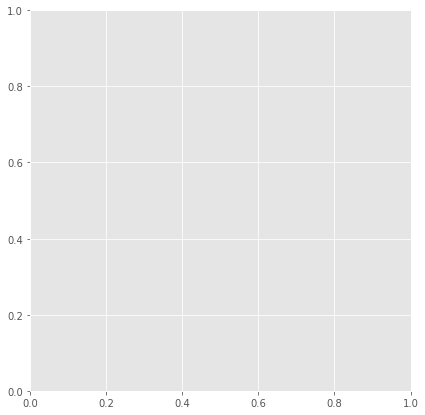

In [17]:
# static map

base = merge_geodf.plot(column="porp_of_non_citizen", cmap="Blues", legend=True, figsize=(7,7))
crla_office_geodf.plot(ax=base, color="r", markersize=5)

In [ ]:
# interactive map

for idx, row in crla_office_df.iterrows():
  folium.Marker(location=[row["latitude"], row["longitude"]],
                popup=row["name"],
                icon=folium.Icon(color='red', icon='building', prefix="fa")).add_to(ca_map)

ca_map.save("map/map_prop_of_non_citizen.html")